## Bibliotecas Utilizadas

In [1]:
import numpy as np
import pandas as pd

### Carregando dados dos filmes

In [8]:
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
filmes.shape

(9742, 3)

## Carregando dados das avaliações

In [10]:
avaliacoes = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true")
avaliacoes.columns = ["usuarioId", "filmeId", "nota", "momento"]
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [11]:
avaliacoes.shape

(100836, 4)

# Visualização dos dados

In [12]:
avaliacoes.loc[avaliacoes.filmeId==1].describe()

,usuarioId,filmeId,nota,momento
count,215.000000,215.0,215.000000,2.150000e+02
mean,306.530233,1.0,3.920930,1.129835e+09
std,180.419754,0.0,0.834859,2.393163e+08
min,1.000000,1.0,0.500000,8.293223e+08
25%,155.500000,1.0,3.500000,8.779224e+08
50%,290.000000,1.0,4.000000,1.106855e+09
75%,468.500000,1.0,4.500000,1.348523e+09
max,610.000000,1.0,5.000000,1.535710e+09


## Desafio 4

In [13]:
notas_medias_por_filme = avaliacoes.groupby('filmeId')['nota'].mean().round(2)
notas_medias_por_filme.head()

filmeId
1    3.92
2    3.43
3    3.26
4    2.36
5    3.07
Name: nota, dtype: float64

## Desafio 2

In [27]:
filmes_com_media = filmes_com_media.rename(columns={'nota': 'nota_media'})
filmes_com_media.head()

,filmeId,titulo,generos,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36
4,5,Father of the Bride Part II (1995),Comedy,3.07


## Desafio 3

In [25]:
total_votos_por_filme = avaliacoes.groupby('filmeId')['nota'].count()
total_votos_por_filme.head()

filmeId
1    215
2    110
3     52
4      7
5     49
Name: nota, dtype: int64

In [28]:
filmes_com_media_e_votos = filmes_com_media.join(total_votos_por_filme, on='filmeId')
filmes_com_media_e_votos = filmes_com_media_e_votos.rename(columns={'nota': 'total_votos'})
filmes_com_media_e_votos.head()

,filmeId,titulo,generos,nota_media,total_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0


In [15]:
filmes_com_media = filmes.join(notas_medias_por_filme, on='filmeId')
filmes_com_media.head()

,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36
4,5,Father of the Bride Part II (1995),Comedy,3.07


In [16]:
filmes_com_media.sort_values('nota', ascending=False).head()

,filmeId,titulo,generos,nota
7080,69860,Eichmann (2007),Drama|War,5.0
9122,145994,Formula of Love (1984),Comedy,5.0
9046,141816,12 Chairs (1976),Adventure|Comedy,5.0
5497,26366,Harlan County U.S.A. (1976),Documentary,5.0
7917,95311,Presto (2008),Animation|Children|Comedy|Fantasy,5.0


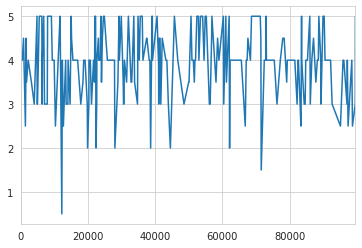

In [29]:
avaliacoes.nota[avaliacoes.filmeId==1].plot();

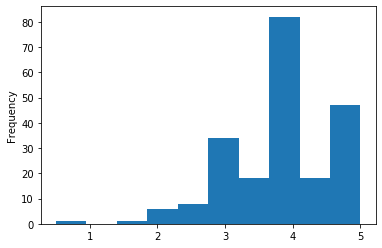

In [18]:
avaliacoes.nota[avaliacoes.filmeId==1].plot(kind='hist');

## Desafio 5 e 6

In [19]:
generos_filmes = filmes.generos.str.get_dummies('|').sum().sort_values(ascending=False)
generos_filmes.head()

Drama       4361
Comedy      3756
Thriller    1894
Action      1828
Romance     1596
dtype: int64

## Desafio 7

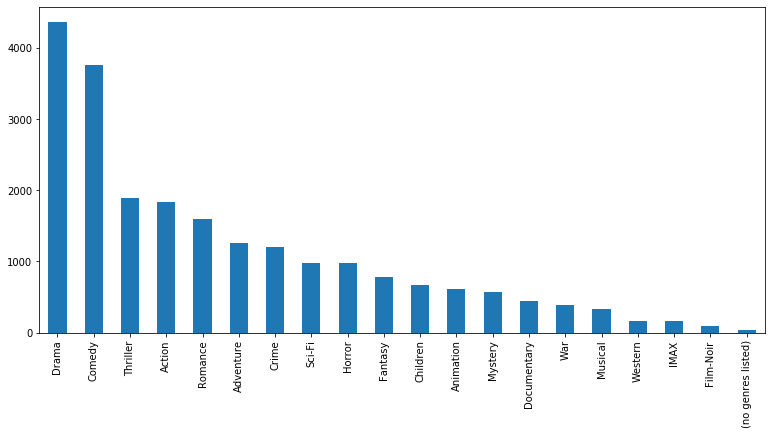

In [20]:
generos_filmes.plot(kind='bar', figsize=(13,6));

# Aula 2

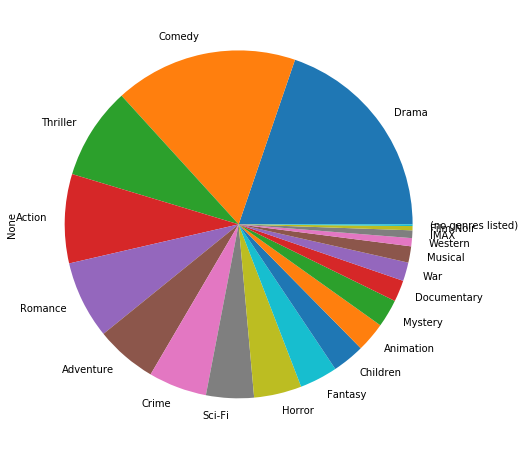

In [21]:
generos_filmes.plot(kind='pie', figsize=(8,8));

## Desafio 1

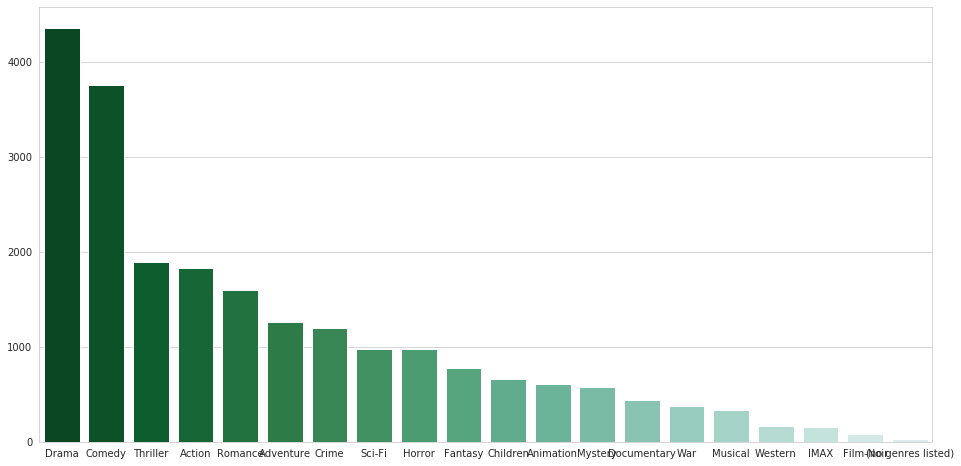

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

plt.figure(figsize=(16,8))
sns.barplot(x=generos_filmes.index,
            y=generos_filmes.values,
            palette=sns.color_palette('BuGn_r', n_colors=len(generos_filmes)+4));

## Desafio 2

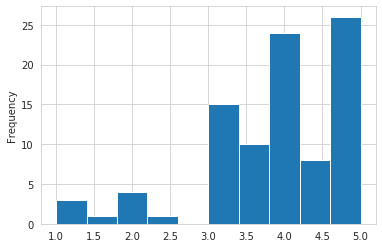

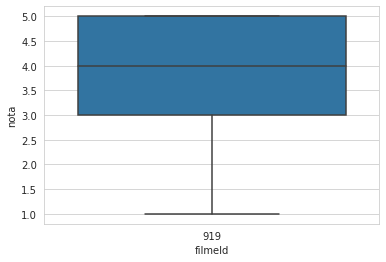

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

In [23]:
def plot_filme(n):
    notas_do_filme = avaliacoes.query(f"filmeId=={n}")["nota"]
    notas_do_filme.plot(kind='hist')
    plt.show()
    print('\n')
    sns.boxplot(data=avaliacoes.query(f"filmeId=={n}"), x="filmeId", y="nota")
    plt.show()
    return notas_do_filme.describe()
plot_filme(919)

## Desafio 3

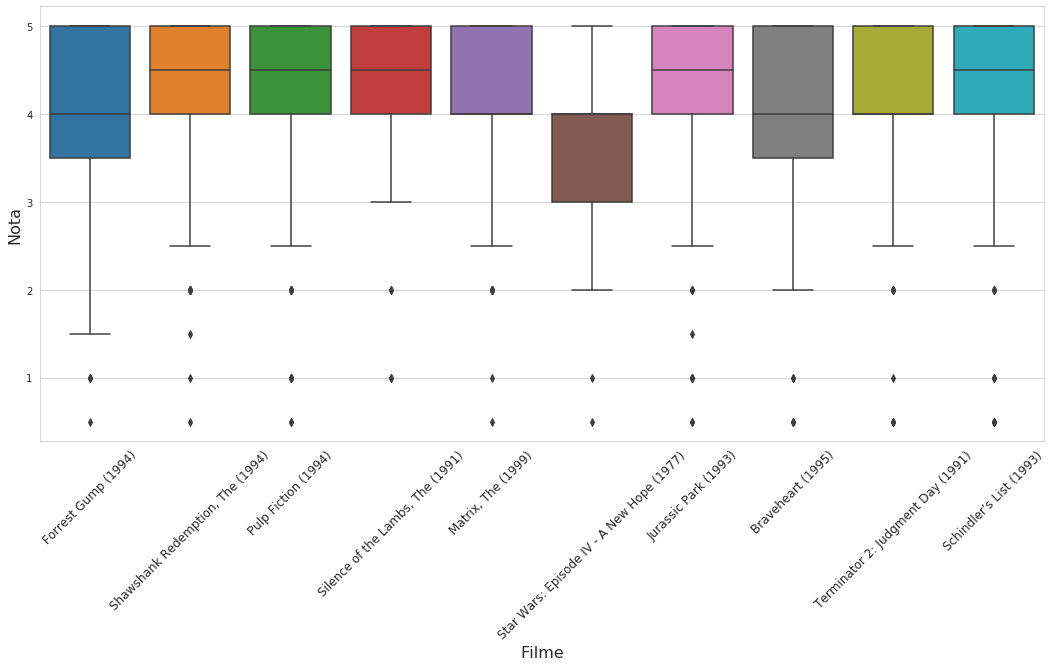

In [30]:
top_10_votos_por_filme = filmes_com_media_e_votos.sort_values(by='total_votos', ascending=False).head(10)
top_10_votos_por_filme_titulos = top_10_votos_por_filme['titulo'].to_list()
top_10_votos_por_filme_ids = top_10_votos_por_filme['filmeId'].to_list()

plt.figure(figsize=(18,8))
ax = sns.boxplot(x='filmeId', y='nota', data=avaliacoes.query(f"filmeId in {top_10_votos_por_filme_ids}"))
ax.set_xticklabels(top_10_votos_por_filme_titulos, fontsize=12)
ax.set_xlabel("Filme", fontsize=16)
ax.set_ylabel("Nota", fontsize=16)
plt.xticks(rotation=45)
plt.show()

## Desafio 4

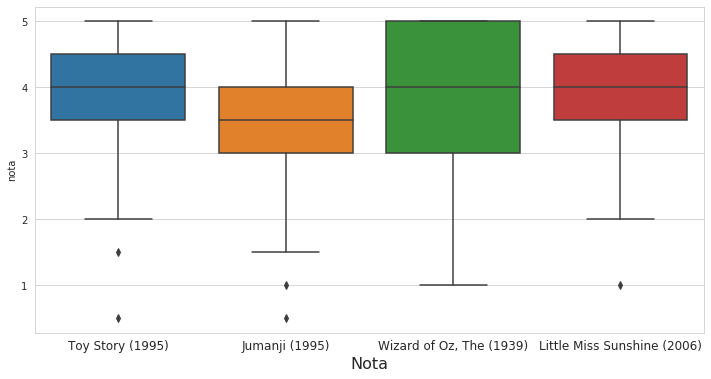

In [31]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(data=avaliacoes.query("filmeId in [1,2,919,46578]"), x="filmeId", y="nota")

ax.set_xticklabels(filmes.query("filmeId in [1,2,919,46578]")['titulo'], fontsize=12)
ax.set_xlabel("Filme", fontsize=16)
ax.set_xlabel("Nota", fontsize=16)
plt.show()

## Desafio 5

In [32]:
def explora_filme(filme_id):
    filme = filmes.query(f"filmeId == {filme_id}")
    notas = avaliacoes.query(f"filmeId == {filme_id}")['nota']
    
    print(f'Filme: {filme.iloc[0, 1]}')
    print()
    
    print(f'Moda: {notas.mode().values}')
    print(f'Média: {notas.mean()}')
    print(f'Mediana: {notas.median()}')

In [33]:
explora_filme(8387)
explora_filme(89386)
explora_filme(3774)

Filme: Police Academy: Mission to Moscow (1994)

Moda: [0.5]
Média: 0.8
Mediana: 0.5
Filme: Pearl Jam Twenty (2011)

Moda: [0.5]
Média: 0.5
Mediana: 0.5
Filme: House Party 2 (1991)

Moda: [0.5 1. ]
Média: 0.75
Mediana: 0.75


## Desafio 6

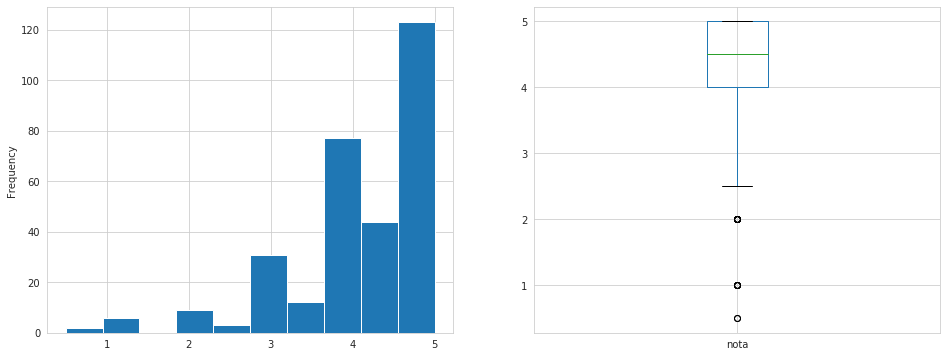

In [35]:
pulp_fiction = avaliacoes.query('filmeId == 296')['nota']

f, axes = plt.subplots(1, 2, figsize=(16,6))
pulp_fiction.plot(kind='hist', ax=axes[0])
pulp_fiction.plot(kind='box', ax=axes[1])
plt.show()

## Desafio 7

In [36]:
filmes_com_media_e_ano = filmes_com_media.copy()
filmes_com_media_e_ano['ano'] = filmes_com_media['titulo'].str.extract("\((\d{4})\)")
filmes_com_media_e_ano.head()

,filmeId,titulo,generos,nota_media,ano
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,1995
4,5,Father of the Bride Part II (1995),Comedy,3.07,1995


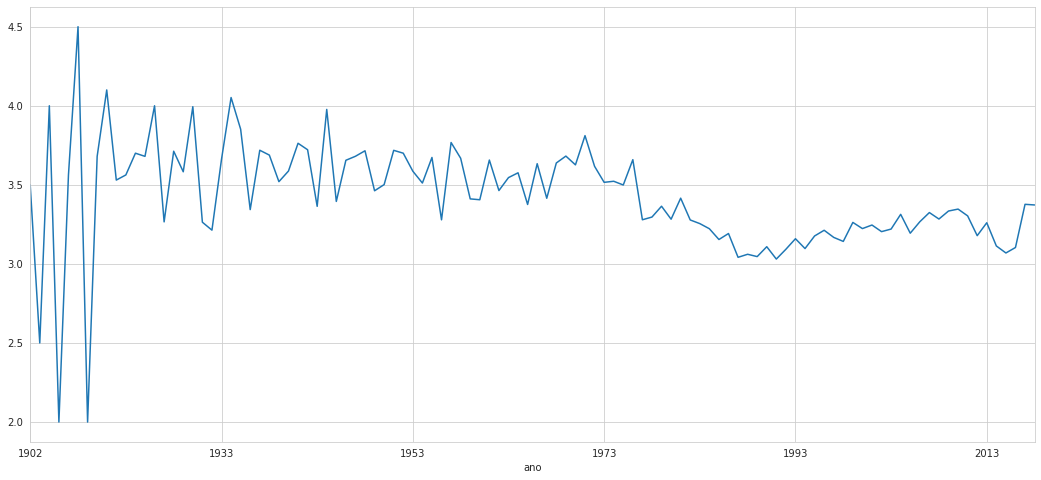

In [37]:
nota_media_por_ano = filmes_com_media_e_ano.groupby('ano')['nota_media'].mean()
plt.figure(figsize=(18,8))
nota_media_por_ano.plot();